<a href="https://colab.research.google.com/github/ivannamal/hw4/blob/main/5_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework #4. Exploratory Data Analysis
#### Author: `Ivanna Malashchuk`
#### Total time spent on h/w (in minutes): `660`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIALOGS_MERGED_DATA_PATH = '/content/drive/My Drive/data.csv'
DIALOGS_META_MERGED_DATA_PATH = '/content/drive/My Drive/._data.csv'

In [ ]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Task 1
## 1. Most frequent sensitive topics
Reveals the main propaganda themes or operational priorities.

Applications:
Monitoring terrorist narratives for counter-propaganda strategies.
Understanding focus areas to anticipate future actions or rhetoric.

In [ ]:
sensitive_counts = df['sensitive-topic'].value_counts()
top_sensitive_counts = sensitive_counts[sensitive_counts.index != 'none'].head(10)
plt.figure(figsize=(10, 6))
top_sensitive_counts.plot(kind='bar', color='blue')
plt.title('Most Frequent Sensitive Topics')
plt.xlabel('Sensitive Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('filtered_sensitive_topics.png', bbox_inches='tight')

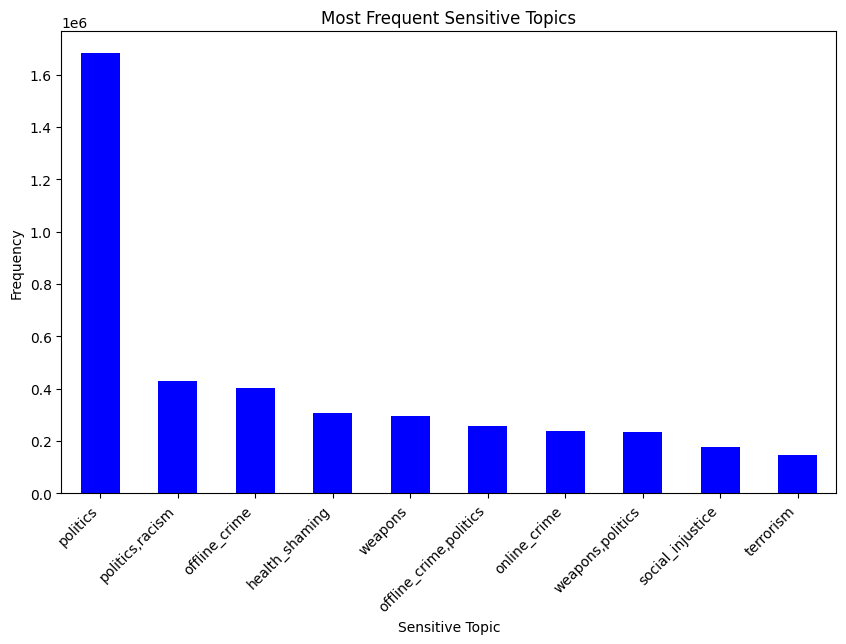

##2. Average Message Length by Content Type
Compares the average message length for various content types (text, images, videos, etc.) used in terrorist channels, indicating communication style differences.

Applications:
Assessing the complexity or depth of propaganda.
Differentiating between short commands and detailed narratives.

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('type')['message_len'].mean().plot(kind='bar', color='coral')
plt.title('Average Message Length by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Message Length')
plt.savefig('avg_message_length_by_type.png', bbox_inches='tight')
plt.close()

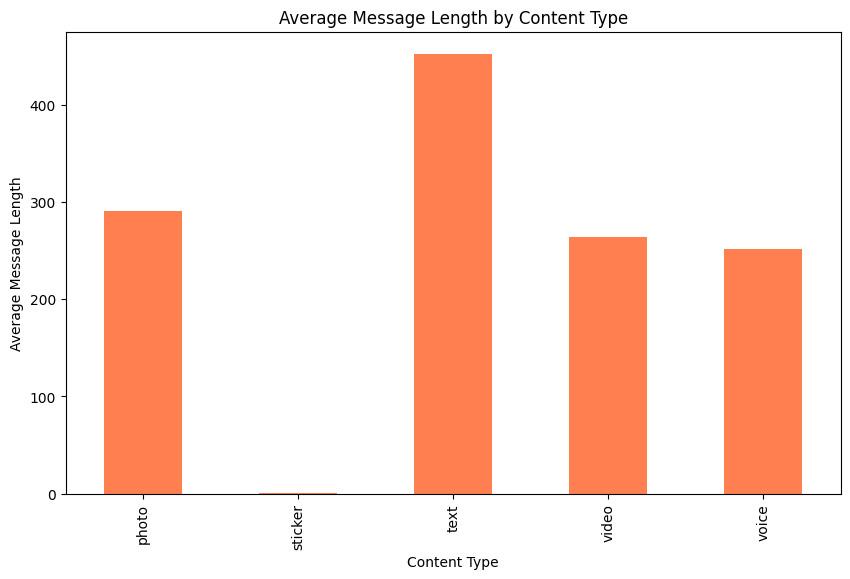

## 3. Correlation between Views and Reactions
Examines the relationship between the number of views and reactions to messages in terrorist channels, revealing the level of audience engagement.

Applications:
Identifying the most effective propaganda methods.
Understanding the audience’s responsiveness to specific messages.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['views'], df['reactions_num'], alpha=0.5, color='red')
plt.title('Correlation between Views and Reactions')
plt.xlabel('Views')
plt.ylabel('Reactions')
plt.savefig('views_vs_reactions.png', bbox_inches='tight')
plt.close()

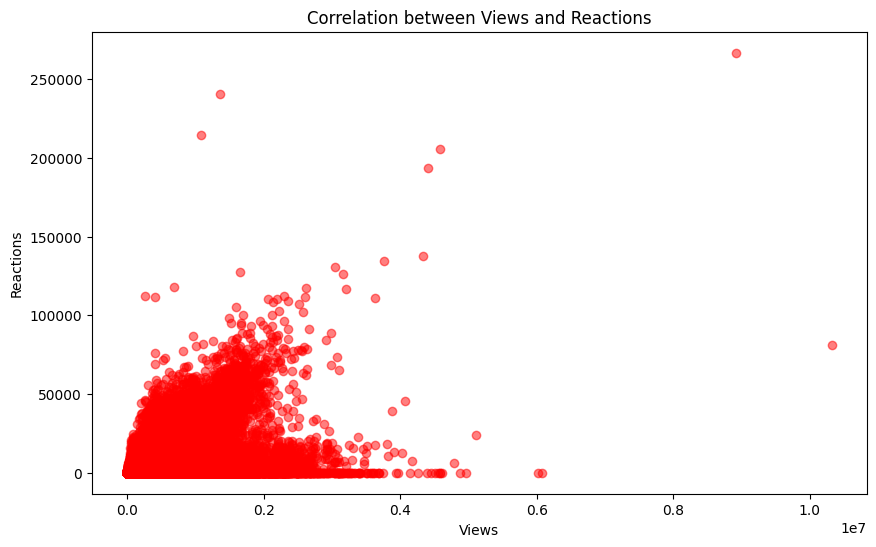

## 4. Posts with and without Reactions
Shows the proportion of posts that received reactions versus those that didn’t in terrorist channels. This reflects overall audience activity and interest.

Applications:
Evaluating the success of specific types of messages.
Determining the level of passive versus active followers.

In [ ]:
plt.figure(figsize=(6, 6))
has_reactions = (df['reactions_num'] > 0).sum()
no_reactions = (df['reactions_num'] == 0).sum()
plt.pie([has_reactions, no_reactions], labels=['Has Reactions', 'No Reactions'], autopct='%1.1f%%', startangle=90)
plt.title('Posts with and without Reactions')
plt.savefig('posts_with_reactions.png', bbox_inches='tight')
plt.close()

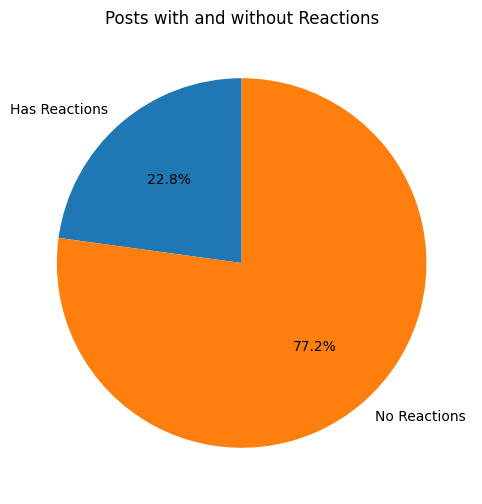

## 5. Most Frequent Content Type
Analyzes the distribution of content types (text, images, etc.) posted in terrorist channels to understand the preferred communication formats.

Applications:
Identifying the primary propaganda delivery methods.
Informing content filtering or blocking strategies.

In [ ]:
plt.figure(figsize=(10, 6))
df['type'].value_counts().plot(kind='bar', color='purple')
plt.title('Most Frequent Content Type')
plt.xlabel('Content Type')
plt.ylabel('Frequency')
plt.savefig('frequent_content_type.png', bbox_inches='tight')
plt.close()

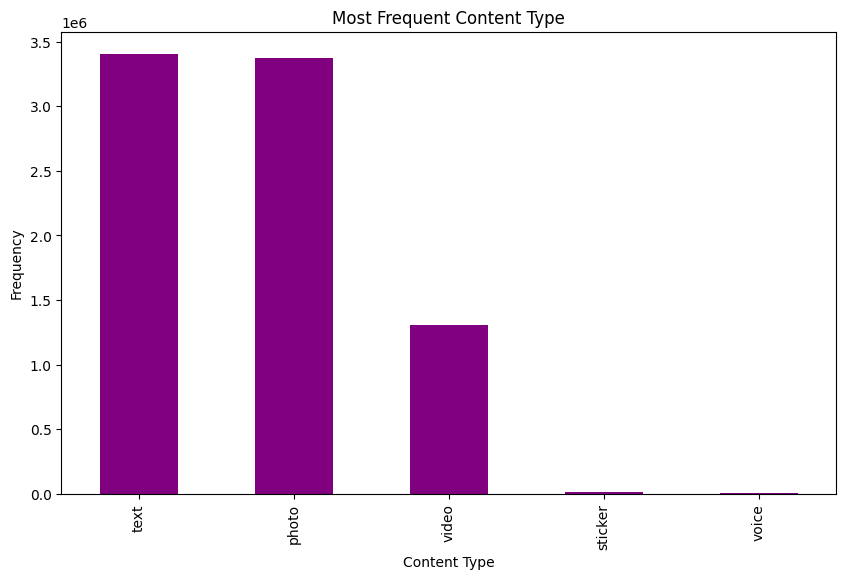

## 6. Average Message Length by Content Type
Focuses on the average message lengths per content type, offering insights into how different media are utilized in terrorist messaging.

Applications:
Tailoring counter-terrorism messaging strategies.
Understanding how different content formats influence narrative delivery.

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('type')['message_len'].mean().plot(kind='bar', color='coral')
plt.title('Average Message Length by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Message Length')
plt.savefig('avg_message_length_by_type.png', bbox_inches='tight')
plt.close()

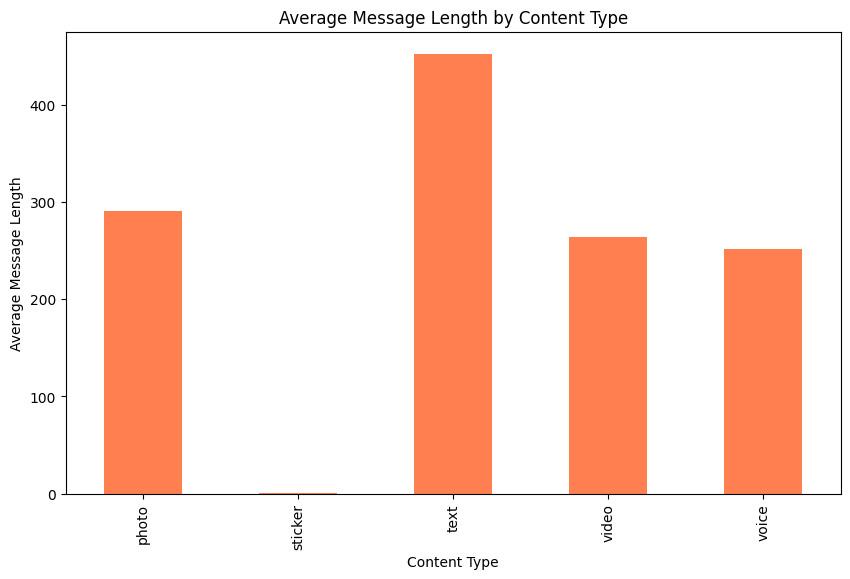

## 7. Average Number of Views by Hour
Identifies when terrorist messages receive the most views, revealing audience activity patterns.

Applications:
Monitoring peak activity times for intervention.
Timing intelligence operations to disrupt messaging campaigns.

In [ ]:
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(10, 6))
df.groupby('hour')['views'].mean().plot(kind='line', marker='o', color='darkblue')
plt.title('Average Number of Views by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.savefig('views_by_hour.png', bbox_inches='tight')
plt.close()

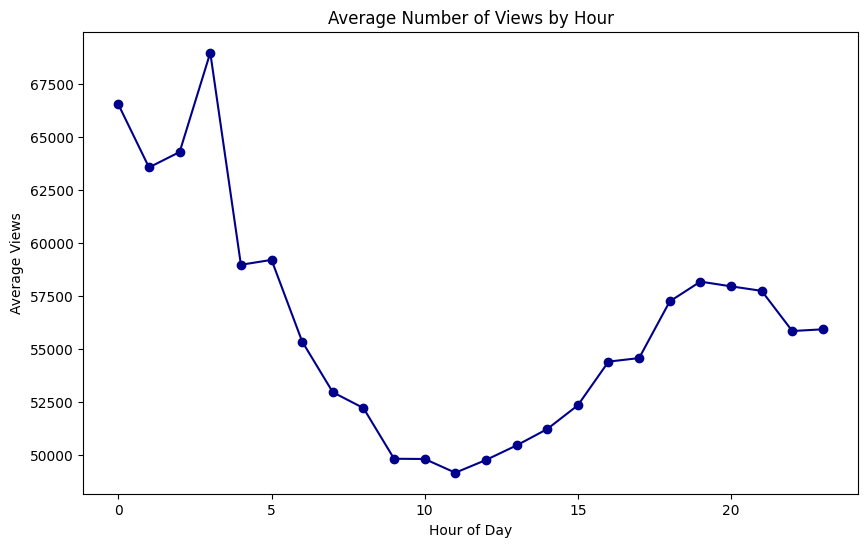

## 8. Average Views by Toxicity Level
Explores how the level of toxicity in terrorist messages correlates with the number of views, identifying the appeal of hostile or aggressive narratives.

Applications:
Understanding the impact of extreme language on audience behavior.
Developing strategies to counter toxic narratives.

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('toxicity')['views'].mean().plot(kind='bar', color='red')
plt.title('Average Views by Toxicity Level')
plt.xlabel('Toxicity')
plt.ylabel('Average Views')
plt.savefig('views_by_toxicity.png', bbox_inches='tight')
plt.close()

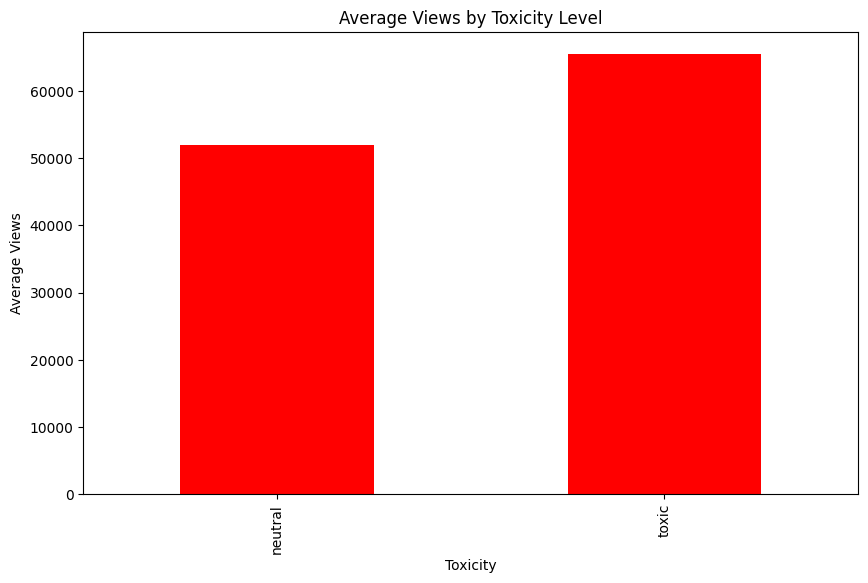

## 9. Number of Posts by Day of the Week
Shows the weekly posting patterns of terrorist channels, helping identify operational rhythms.

Applications:
Predicting when significant messages or propaganda are likely to be released.
Aligning monitoring efforts with peak activity days.

In [ ]:
df['day_of_week'] = df['datetime'].dt.day_name()
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='blue')
plt.title('Number of Posts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.savefig('posts_by_day_of_week.png', bbox_inches='tight')
plt.close()

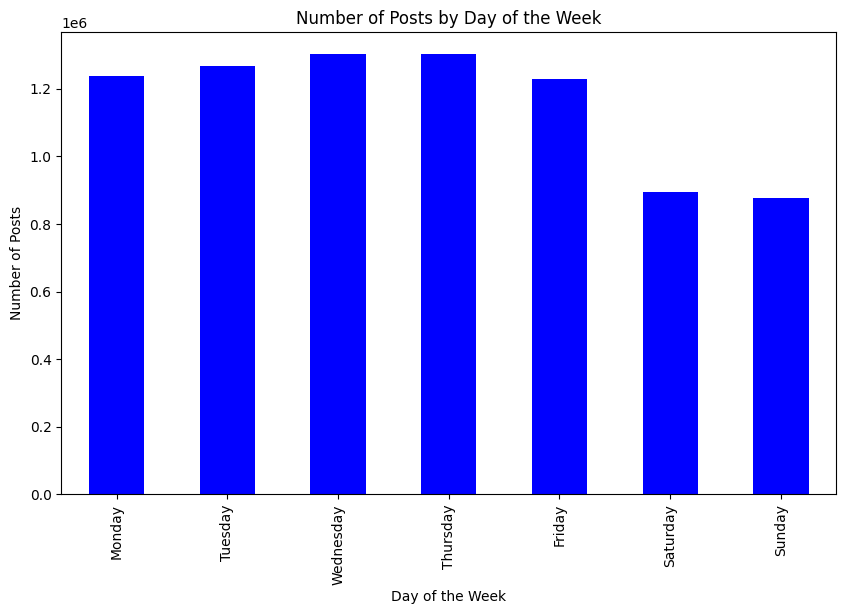

## 10. Average Message Length for Top Sensitive Topics
Analyzes how detailed or brief discussions are for the top three sensitive topics in terrorist channels.

Applications:
Assessing the depth of narratives on key topics.
Identifying whether sensitive issues are covered in quick updates or lengthy propaganda.

In [ ]:
top_sensitive_topics = df['sensitive-topic'].value_counts().index[:3]
filtered_df = df[df['sensitive-topic'].isin(top_sensitive_topics)]
plt.figure(figsize=(10, 6))
filtered_df.groupby('sensitive-topic')['message_len'].mean().plot(kind='bar', color='darkgreen')
plt.title('Average Message Length for Top Sensitive Topics')
plt.xlabel('Sensitive Topic')
plt.ylabel('Average Message Length')
plt.savefig('message_length_top_sensitive.png', bbox_inches='tight')
plt.close()

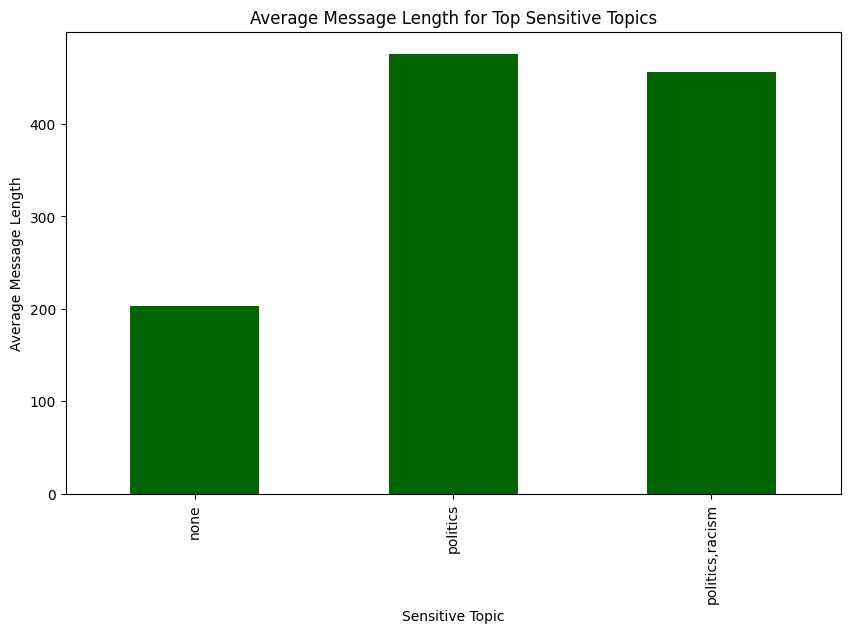

## 11. Average Message Length by Toxicity Level
Examines the relationship between the toxicity of terrorist messages and their average length, providing insights into hostile communication styles.

Applications:
Identifying patterns in aggressive messaging.
Enhancing detection of toxic messages for content moderation.

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('toxicity')['message_len'].mean().plot(kind='bar', color='orange')
plt.title('Average Message Length by Toxicity Level')
plt.xlabel('Toxicity')
plt.ylabel('Average Message Length')
plt.savefig('message_length_by_toxicity.png', bbox_inches='tight')
plt.close()

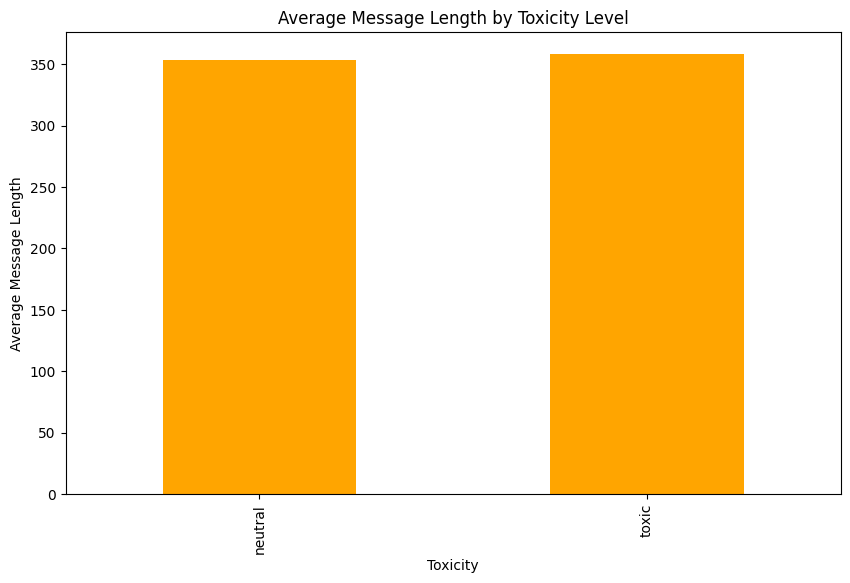

## 12. Frequency of Toxic Messages by Hour
Tracks the hours when the most toxic messages are posted, revealing potential times of coordinated propaganda efforts.

Applications:
Timing interventions to counter toxic narratives.
Understanding operational timing for psychological operations.

In [ ]:
toxic_hours = df[df['toxicity'] == 'toxic'].groupby(df['datetime'].dt.hour).size()
plt.figure(figsize=(10, 6))
toxic_hours.plot(kind='bar', color='crimson')
plt.title('Frequency of Toxic Messages by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Toxic Messages')
plt.savefig('toxic_messages_by_hour.png', bbox_inches='tight')
plt.close()

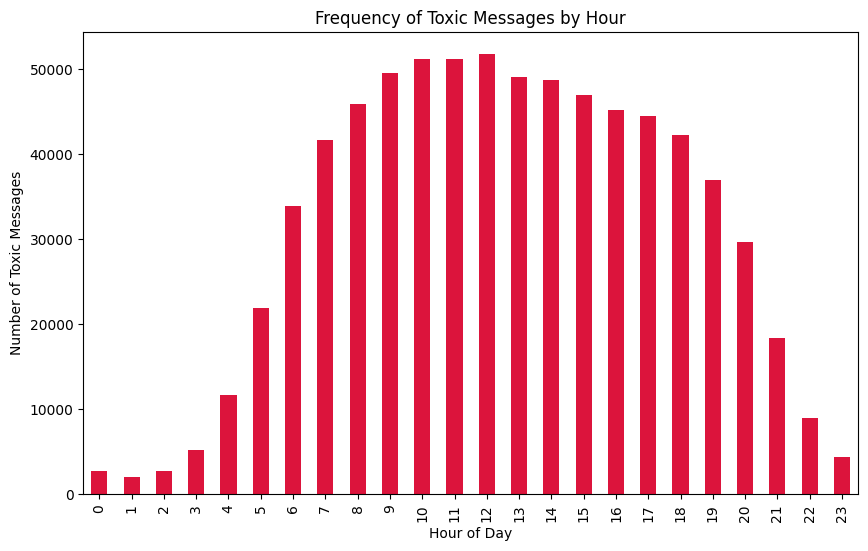

## 13. Average Reaction Count by Content Type
Shows how different types of content (text, images, etc.) perform in terms of reactions, highlighting the audience’s preferences.

Applications:
Analyzing which formats are most effective for propaganda.
Informing counter-content strategies to reduce engagement.

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('type')['reactions_num'].mean().plot(kind='bar', color='blue')
plt.title('Average Reaction Count by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Reaction Count')
plt.savefig('avg_reactions_by_type.png', bbox_inches='tight')
plt.close()

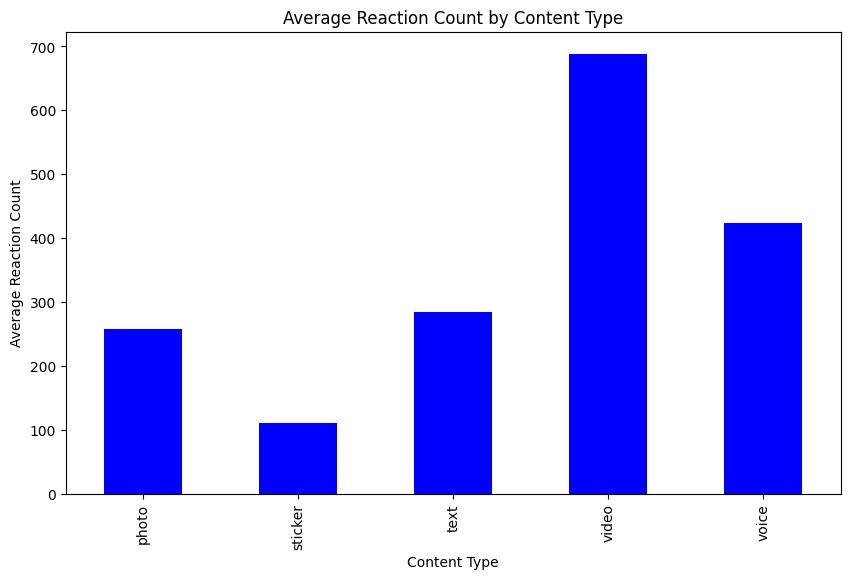

## 14. Average Number of Reactions by Day of the Week
Highlights the days when audience reactions are highest.

Applications:
Planning monitoring schedules.
Predicting the timing of audience-driven escalations.

In [ ]:
    plt.figure(figsize=(10, 6))
    df.groupby('day_of_week')['reactions_num'].mean().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ).plot(kind='bar', color='purple')
    plt.title('Average Number of Reactions by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Reactions')
    plt.savefig('avg_reactions_by_day.png', bbox_inches='tight')
    plt.close()

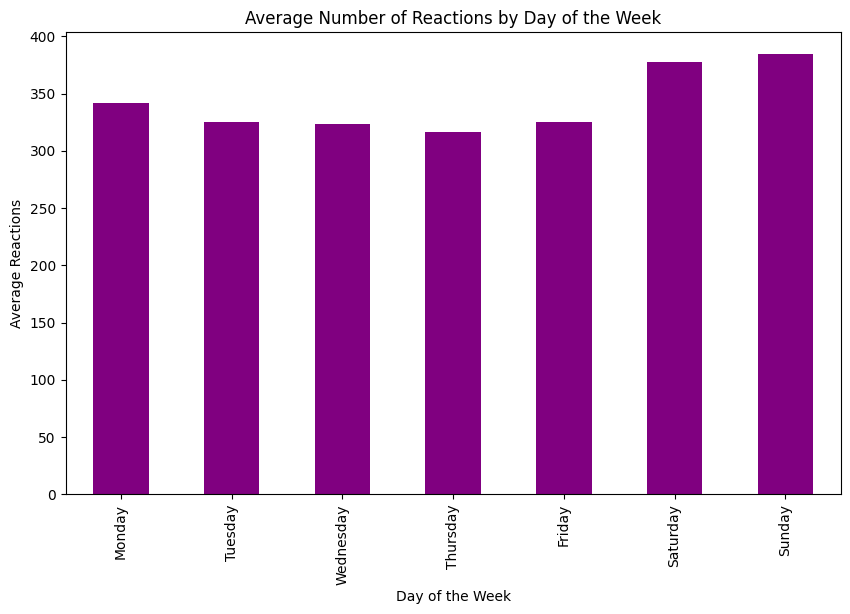

## 15. Average Views and Reactions for Text vs. Non-Text Content
Reveals which formats are more effective for propaganda.

Applications:
Identifying the role of multimedia in terrorist propaganda.
Tailoring interventions for specific content types.

In [ ]:
    plt.figure(figsize=(10, 6))
    df['is_text'] = df['type'] == 'text'
    df.groupby('is_text')[['views', 'reactions_num']].mean().plot(kind='bar', color=['teal', 'coral'])
    plt.title('Average Views and Reactions for Text vs. Non-Text Content')
    plt.xlabel('Content Type (Text vs. Non-Text)')
    plt.ylabel('Average')
    plt.legend(['Views', 'Reactions'])
    plt.xticks([0, 1], ['Non-Text', 'Text'], rotation=0)
    plt.savefig('text_vs_nontext_avg_views_reactions.png', bbox_inches='tight')
    plt.close()

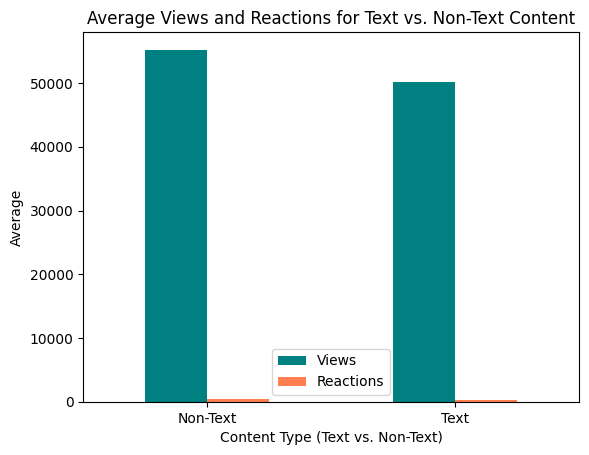

## 16. Correlation of Message Length and Views by Content Type
Explores how the length of messages affects their views across different content types, offering insights into effective communication styles.

Applications:
Informing counter-messaging strategies to reduce the impact of long-form propaganda.
Predicting audience attention spans for certain formats.

In [ ]:
    plt.figure(figsize=(10, 6))
    for content_type in df['type'].unique():
        subset = df[df['type'] == content_type]
        plt.scatter(subset['message_len'], subset['views'], label=content_type, alpha=0.5)
    plt.title('Correlation of Message Length and Views by Content Type')
    plt.xlabel('Message Length')
    plt.ylabel('Views')
    plt.legend(title='Content Type')
    plt.savefig('message_length_vs_views_by_type.png', bbox_inches='tight')
    plt.close()

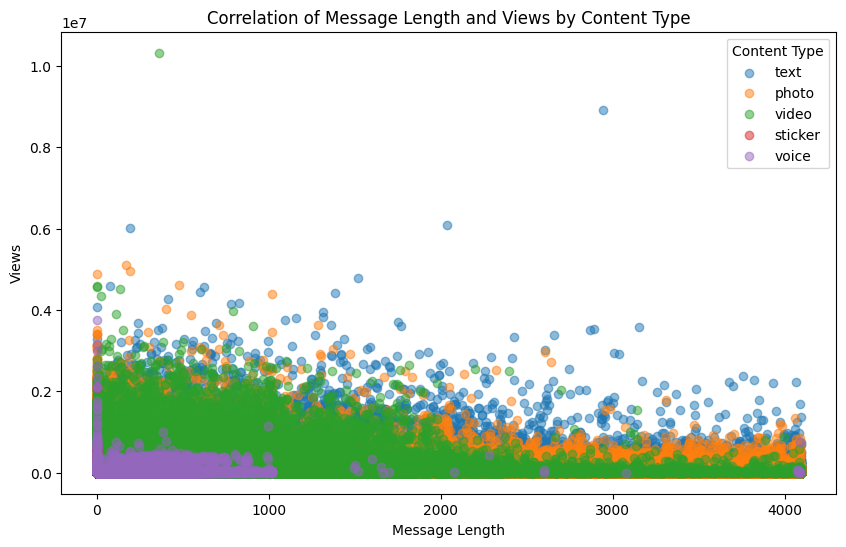

## 17. Top 5 Most Common Sensitive Topics
Highlights key themes of propaganda or coordination.

Applications:
Targeting intelligence efforts on frequently discussed topics.
Developing counter-narratives around common themes.

In [ ]:
    plt.figure(figsize=(10, 6))
    df['sensitive-topic'].value_counts().head(5).plot(kind='bar', color='blue')
    plt.title('Top 5 Most Common Sensitive Topics')
    plt.xlabel('Sensitive Topic')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.savefig('top_common_sensitive_topics.png', bbox_inches='tight')
    plt.close()

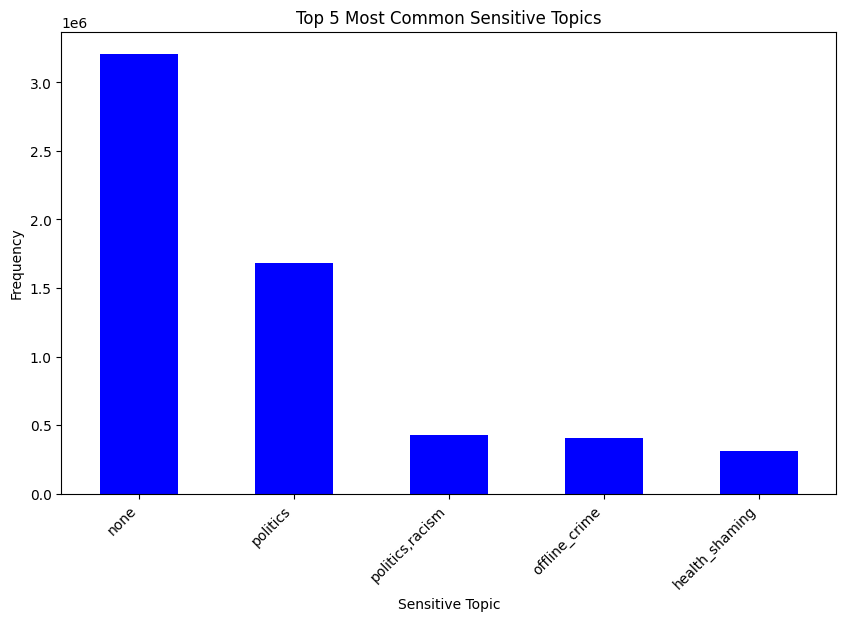

## 18. Content Type Distribution
The percentage distribution of content types in terrorist channels.

Applications:
Adjusting content moderation techniques for specific formats.
Understanding the balance between text and multimedia in propaganda.

In [ ]:
    plt.figure(figsize=(6, 6))
    content_counts = df['type'].value_counts()
    plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=90,
            colors=['orange', 'blue', 'green'])
    plt.title('Content Type Distribution')
    plt.savefig('content_type_distribution.png', bbox_inches='tight')
    plt.close()

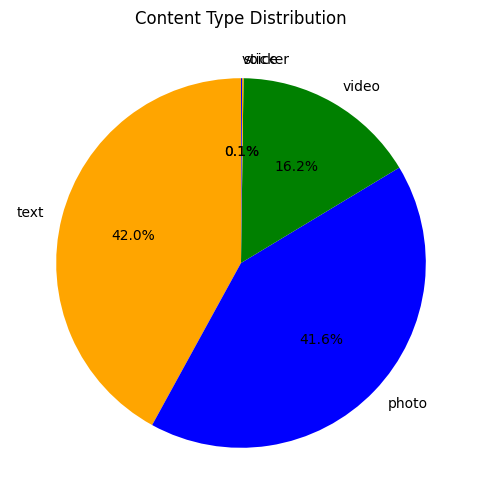

## 19. Probability of Having Reactions by Message Length
Analyzes how message length influences the likelihood of receiving reactions, providing insights into effective communication tactics in terrorist channels.

Applications:
Predicting the virality of terrorist messages.
Identifying trends to suppress audience engagement.

In [ ]:
df['has_reaction'] = df['reactions_num'] > 0
df['message_len_bins'] = pd.cut(df['message_len'], bins=10)
reaction_prob_by_length = df.groupby('message_len_bins')['has_reaction'].mean()

plt.figure(figsize=(10, 6))
reaction_prob_by_length.plot(kind='bar', color='darkred')
plt.title('Probability of Having Reactions by Message Length')
plt.xlabel('Message Length (binned)')
plt.ylabel('Probability of Reactions')
plt.savefig('reaction_probability_by_message_length.png', bbox_inches='tight')
plt.close()

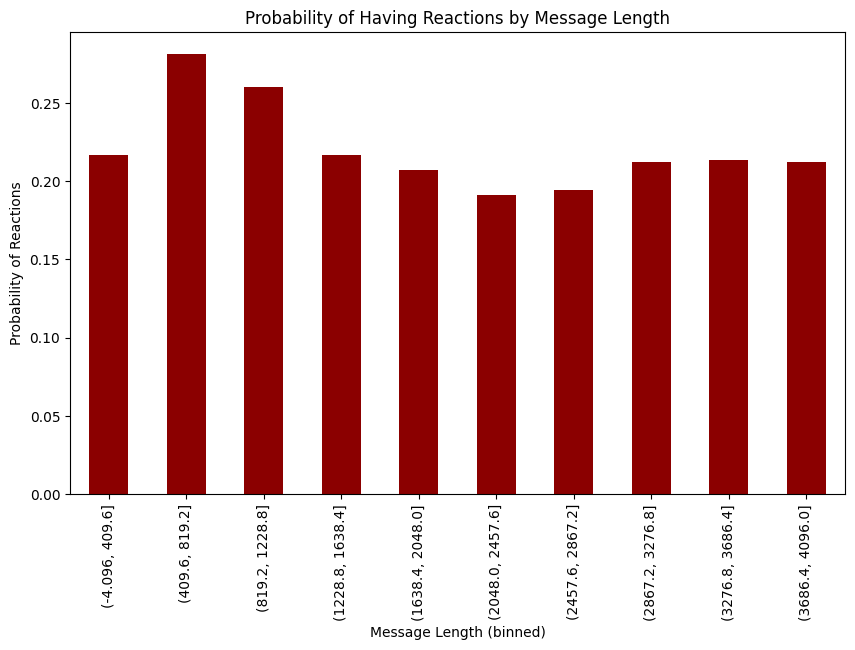

## 20. Number of Messages by Month
Identifies event-driven activity spikes.

Applications:
Anticipating heightened activity during specific months.
Aligning monitoring efforts.

In [ ]:
plt.figure(figsize=(10, 6))
df['month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
      'December']
).plot(kind='bar', color='green')
plt.title('Number of Messages by Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.savefig('messages_by_month.png', bbox_inches='tight')
plt.close()

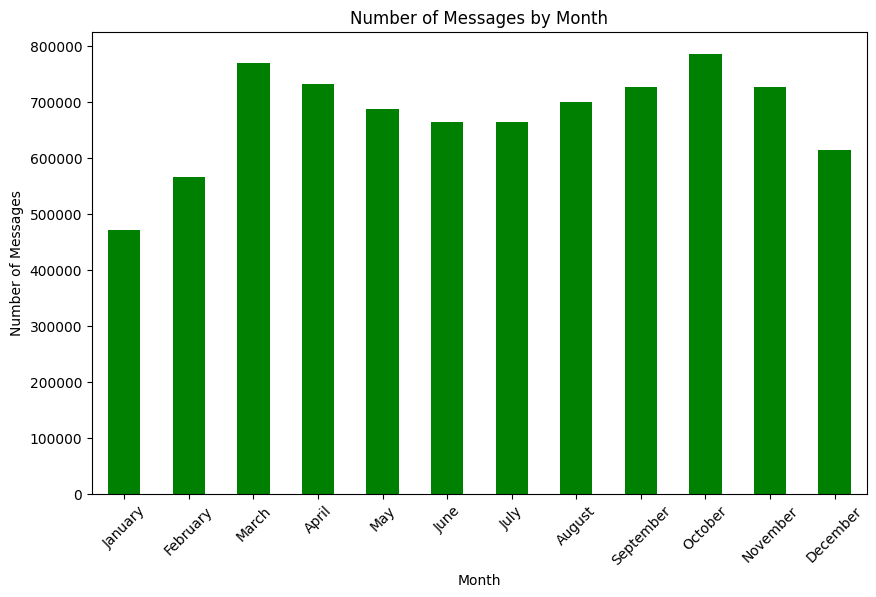